In [ ]:
import cv2
img=cv2.imread(r"/content/pic.jpg")
print(img)

[[[146 191 205]
  [139 183 196]
  [119 158 172]
  ...
  [238 246 246]
  [239 247 247]
  [239 247 247]]

 [[146 191 205]
  [139 183 196]
  [119 158 172]
  ...
  [238 246 246]
  [239 247 247]
  [238 246 246]]

 [[146 191 205]
  [138 182 195]
  [119 158 172]
  ...
  [238 246 246]
  [238 246 246]
  [238 246 246]]

 ...

 [[228 236 236]
  [225 233 233]
  [224 232 232]
  ...
  [236 241 242]
  [237 242 243]
  [238 243 244]]

 [[229 237 237]
  [229 237 237]
  [229 237 237]
  ...
  [238 243 244]
  [239 244 245]
  [239 244 245]]

 [[228 236 236]
  [229 237 237]
  [231 239 239]
  ...
  [242 247 248]
  [241 246 247]
  [240 245 246]]]


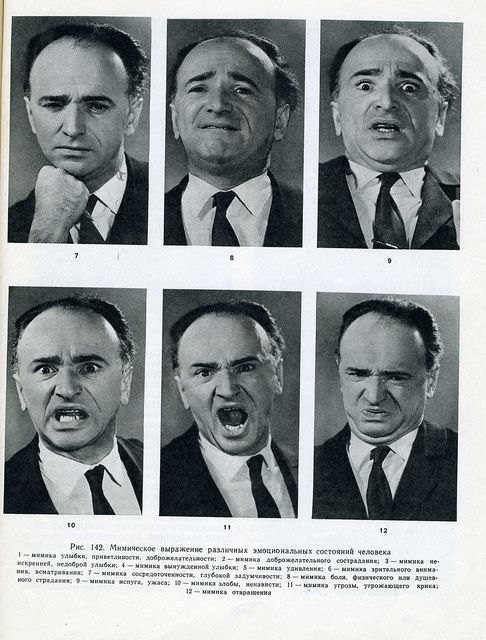

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
img.shape

(640, 486, 3)

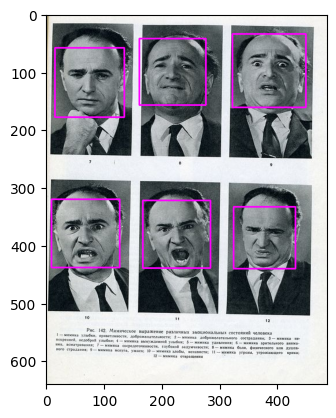

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread("/content/pic.jpg")
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.01, minNeighbors=50)

# Draw rectangles around the detected faces
for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 255), 2)

# Display the image with detected faces
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

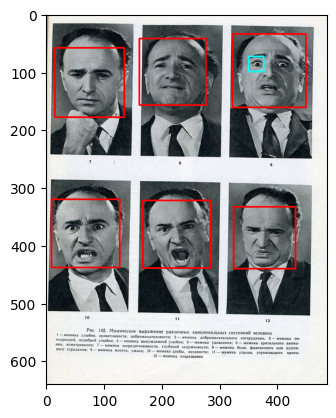

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load the image
img = cv2.imread("/content/pic.jpg")

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = face_cascade.detectMultiScale(gray_img, scaleFactor=1.01, minNeighbors=45)

# Draw rectangles around the detected faces
for x, y, w, h in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Define the region of interest for eyes within the detected face region
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.08, minNeighbors=20)
    # Draw rectangles around the detected eyes
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (255, 255, 0), 2)

# Display the image with detected faces and eyes
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


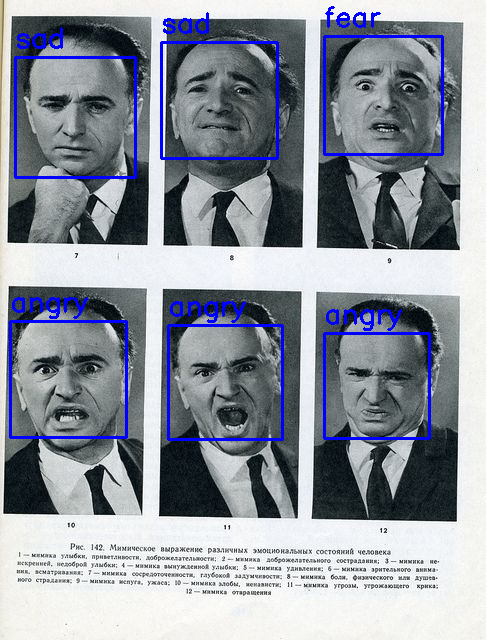

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from deepface import DeepFace

# Load the face cascade classifier
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Path to the image
image_path = "/content/pic.jpg"

# Read the image
image = cv2.imread(image_path)

if image is None:
    print("Error: Unable to load the image.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extract the face region from the image
        face_roi = image[y:y+h, x:x+w]

        # Perform emotion recognition
        results = DeepFace.analyze(face_roi, actions=['emotion'])

        # Check if results is a list
        if isinstance(results, list):
            # Process each result in the list
            for result in results:
                # Get the dominant emotion
                emotion = result['dominant_emotion']

                # Draw rectangle around the face
                cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

                # Display the detected emotion above the face
                cv2.putText(image, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        else:
            # Get the dominant emotion
            emotion = results['dominant_emotion']

            # Draw rectangle around the face
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

            # Display the detected emotion above the face
            cv2.putText(image, emotion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image with detected faces and emotions
    cv2_imshow(image)
